# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

## HIỂU DỮ LIỆU

1. Đọc dữ liệu
2. Xoá cột `Unnamed: 0`
3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [2]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tips = pd.read_csv('data/tips.csv')
#2 axis=1 cho column, axis=0 cho row

tips= tips.drop('Unnamed: 0',axis=1)
# tips.drop('Unnamed: 0',axis=1,implace=True) chèn dataFrame mới lên tips luôn không phải gán lại
#3
print("3.")
print("size:",tips.shape[0], "\nnumbers of attribute: ",tips.shape[1], "\nand that are ",tips.count().index,'\n')
#4
print("4.")
tips.info()
#5
print("5.")
soLuongNamNu= tips.groupby(['sex']).size()
print('số lượng nam nữ',soLuongNamNu)
so_Luong_Nguoi=soLuongNamNu.sum()
ti_le_Nam_Nu= soLuongNamNu.values / so_Luong_Nguoi *100
print("tỉ lệ nam nữ",ti_le_Nam_Nu,'\n')
#6
print("6.")
soLuongNguoiHutThuoc= tips.groupby(['smoker']).size()
print('số lượng người hút thuốc',soLuongNguoiHutThuoc)
ti_le_Nguoi_Hut_Thuoc= soLuongNguoiHutThuoc.values / soLuongNguoiHutThuoc.sum() *100
print('tỉ lệ người hút thuốc',ti_le_Nguoi_Hut_Thuoc,'\n')
#7
print("7.")
loai_Ngay_Khach_Den= tips.groupby(['day']).size()
loai_Ngay_Khach_Den_Nhieu_Nhat = loai_Ngay_Khach_Den.max()
print('Ngày khách đến nhiều nhất',loai_Ngay_Khach_Den.idxmax(),' với tỉ lệ là',"%0.2f%%"%(loai_Ngay_Khach_Den_Nhieu_Nhat/loai_Ngay_Khach_Den.sum()*100))
#8
print("8.")
loai_Bua_An= tips.groupby(['time']).size()
print('Bữa an được phục vụ nhiều nhất', loai_Bua_An.idxmax(),'với tỉ lệ là', f"{loai_Bua_An.max()/loai_Bua_An.sum()*100:.2f}%")


3.
size: 244 
numbers of attribute:  7 
and that are  Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object') 

4.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
5.
số lượng nam nữ sex
Female     87
Male      157
dtype: int64
tỉ lệ nam nữ [35.6557377 64.3442623] 

6.
số lượng người hút thuốc smoker
No     151
Yes     93
dtype: int64
tỉ lệ người hút thuốc [61.8852459 38.1147541] 

7.
Ngày khách đến nhiều nhất Sat  với tỉ lệ là 35.66%
8.
Bữa an được phục vụ nhiều nhất Dinner với 

## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
5. Thống kê tổng số tiền tip nhận được theo ngày.

In [114]:
#1
tip_Bang_0= tips.loc[tips.tip==0].count().tip
tong_Bill= tips.count().total_bill
ti_Le_Tip=100- tip_Bang_0/tong_Bill*100
print("%0.2f%%"%(ti_Le_Tip))
print("\n2.")
#2
tong_Tien_Tip= tips.tip.sum()
tong_Total_Bill= tips.total_bill.sum()
print("%0.2f%%"%(tong_Tien_Tip/tong_Total_Bill*100))
print("\n3.")
#3
loc_Gioi_Tinh_Nu =tips.loc[tips.sex=="Female"]
tip_Cua_Nu= loc_Gioi_Tinh_Nu.tip.sum()
tip_Cua_Nam= tips.tip.sum()-tip_Cua_Nu
print("Tip của nữ:","%0.2f"%tip_Cua_Nu,"Tip của nam:","%0.2f"%tip_Cua_Nam)
if(tip_Cua_Nu>tip_Cua_Nam) :
    print("Tip của nữ nhiều hơn nam","%0.2f"%(tip_Cua_Nu-tip_Cua_Nam))
elif(tip_Cua_Nu==tip_Cua_Nam):
    print("Tip của nữ = nam")
else:
     print("Tip của nữ ít hơn nam","%0.2f"%(tip_Cua_Nam-tip_Cua_Nu))

so_Lan_Nu_Tip= loc_Gioi_Tinh_Nu.count().tip
print("Số lần nữ tip: ",so_Lan_Nu_Tip)
so_Lan_Nam_Tip = tips.count().tip-so_Lan_Nu_Tip
print("Số lần nam tip: ",so_Lan_Nam_Tip)
print("\n4.")
#4
# cách 1
nguoi_Hut_Thuoc= tips.loc[tips.smoker=="Yes"]
nguoi_Khong_Hut_Thuoc= tips.loc[tips.smoker=="No"]
tip_Cua_Nguoi_Hut_Thuoc= nguoi_Hut_Thuoc.tip.sum()
tip_Cua_Nguoi_Khong_Hut_Thuoc= nguoi_Khong_Hut_Thuoc.tip.sum()
print("Tip của người hút thuốc :","%0.2f"%tip_Cua_Nguoi_Hut_Thuoc,"Tip của người không hút thuốc:","%0.2f"%tip_Cua_Nguoi_Khong_Hut_Thuoc)
if(tip_Cua_Nguoi_Hut_Thuoc>tip_Cua_Nguoi_Khong_Hut_Thuoc) :
    print("Tip của  người hút thuốc nhiều hơn người không hút thuốc","%0.2f"%(tip_Cua_Nu-tip_Cua_Nam))
elif(tip_Cua_Nu==tip_Cua_Nam):
    print("Tip của  người hút thuốc = người không hút thuốc")
else:
     print("Tip của  người hút thuốc nhiều hơn người không hút thuốc","%0.2f"%(tip_Cua_Nam-tip_Cua_Nu))

so_Lan_Nguoi_Hut_Thuoc_Tip= nguoi_Hut_Thuoc.count().tip
print("Số lần người hút thuốc tip: ",so_Lan_Nguoi_Hut_Thuoc_Tip)
so_Lan_Nguoi_Khong_Hut_Thuoc_Tip = nguoi_Khong_Hut_Thuoc.count().tip
print("Số lần người không hút thuốc tip: ",so_Lan_Nguoi_Khong_Hut_Thuoc_Tip)
print("\n5.")
## cách 2
# cot_Tip_Va_Somker= tips[["tip","smoker"]]
# so_Tien_Tip_Cua_Somker= cot_Tip_Va_Somker.groupby(["smoker"]).sum()
# print(so_Tien_Tip_Cua_Somker)
#5
# #tips.describe(include='all')
cot_Tip_Va_Day= tips[["tip","day"]]
tinh_So_Tien_Tip_Trong_Ngay= cot_Tip_Va_Day.groupby(["day"]).sum()
print(tinh_So_Tien_Tip_Trong_Ngay)



100.00%

2.
15.15%

3.
Tip của nữ: 246.51 Tip của nam: 485.07
Tip của nữ ít hơn nam 238.56
Số lần nữ tip:  87
Số lần nam tip:  157

4.
Tip của người hút thuốc : 279.81 Tip của người không hút thuốc: 451.77
Tip của  người hút thuốc nhiều hơn người không hút thuốc 238.56
Số lần người hút thuốc tip:  93
Số lần người không hút thuốc tip:  151

5.
         tip
day         
Fri    51.96
Sat   260.40
Sun   247.39
Thur  171.83


# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib

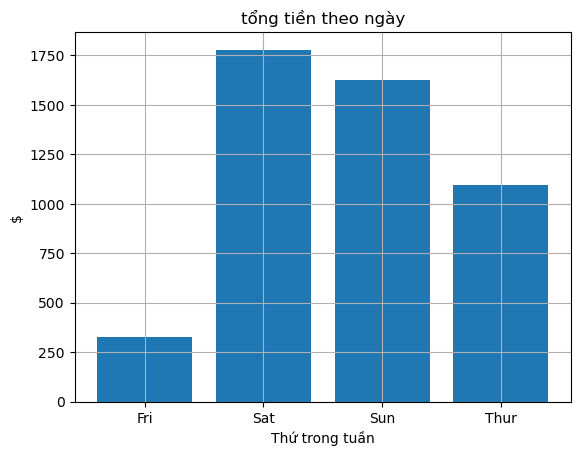

In [46]:
import numpy as np
import matplotlib.pyplot as plt
# #1
# cot_Tip_Va_Day= tips[["tip","day"]]
# so_Tien_Tip_Trong_Ngay= cot_Tip_Va_Day.groupby(["day"]).sum()

# plt.plot(so_Tien_Tip_Trong_Ngay.index, so_Tien_Tip_Trong_Ngay.values)
# plt.title('Số tiền tip theo ngày')
# plt.ylabel('$')
# plt.xlabel('Thứ trong tuần')
# plt.grid(True)
# for ngay,row in so_Tien_Tip_Trong_Ngay.iterrows():
#     plt.text(ngay, row['tip']+1, f"{row['tip']:.2f}", color='gray')
# plt.show()
# #2
# cot_Tip_Va_Time= tips[["tip","time"]]
# so_Tien_Tip_Theo_Time= cot_Tip_Va_Time.groupby(["time"]).sum()
# #When you use so_Tien_Tip_Theo_Time.values, it returns a 2D array, 
# # which isn’t directly compatible with the plt.bar function. 
# # By using so_Tien_Tip_Theo_Time['tip'].values, you get a 1D array of the tip amounts, 
# # which is what plt.bar expects for the heights of the bars.
# bars= plt.bar(so_Tien_Tip_Theo_Time.index, so_Tien_Tip_Theo_Time['tip'].values)
# plt.title('Số tiền tip theo bữa ăn')
# plt.xlabel('Loại bữa ăn')
# plt.ylabel('$')
# for bar in bars:
#     #x (float): The x-coordinate for the text location.
#     #y (float): The y-coordinate for the text location.
#     #s (str):The string of text that you want to display
#     #va (vertical alignment):
#     #  'top': Aligns text above the y coordinate.
#     # 'center': Centers the text at the y coordinate.
#     # 'bottom': Aligns text below the y coordinate.
#     # 'baseline': Aligns text at the baseline of the font.
#     #ha (horizontal alignment): Controls the horizontal alignment of the text relative to the x coordinate
#     # 'left': Aligns text to the left of the x coordinate.
#     # 'center': Centers the text at the x coordinate.
#     # 'right': Aligns text to the right of the x coordinate.
#     plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), va='bottom',ha='center' )
# plt.show()
#3
# total_bill = tips['total_bill'].values
# plt.hist(total_bill,histtype='stepfilled',label ='hist tổng hóa đơn')
# # tạo 1 khung nhỏ cho label
# plt.legend()
# plt.show()
#4
# total_bill = tips['total_bill'].values
# plt.boxplot(total_bill)
# plt.show()
#6
cot_total_bill_Va_Day= tips[["total_bill","day"]]
tinh_total_bill_Trong_Ngay= cot_total_bill_Va_Day.groupby(["day"]).sum()
plt.bar(tinh_total_bill_Trong_Ngay.index, tinh_total_bill_Trong_Ngay['total_bill'].values)
plt.title('tổng tiền theo ngày')
plt.ylabel('$')
plt.xlabel('Thứ trong tuần')
plt.grid(True)
plt.show()



## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn

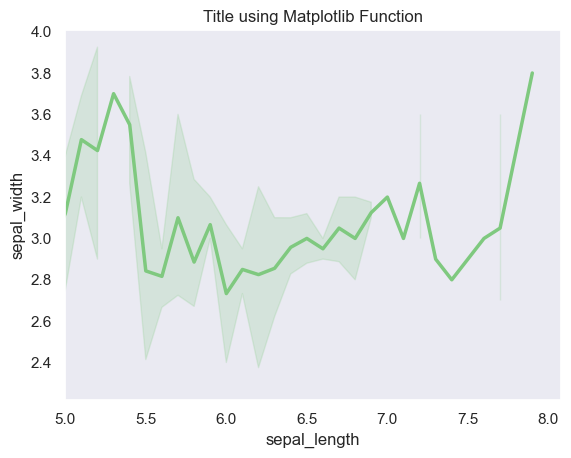

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# loading dataset  
data = sns.load_dataset("iris")  
  
# draw lineplot  
sns.lineplot(x="sepal_length", y="sepal_width", data=data)  
# set_style(style=None, rc=None) darkgrid,whitegrid,dark,white,ticks
sns.set_style("dark")
# sns.set_style("ticks",      
#             {"xtick.major.size":5,
#             "ytick.major.size":5})

sns.set_context("notebook",             # Set context to "notebook",
                    font_scale=1,       #  Scale font elements and 
                    rc={"lines.linewidth":2.5})# override param mapping
# setting another default color palette 
sns.set_palette('Accent') 
# changing the figure size 
# plt.figure(figsize = (2, 4))
# setting the title using Matplotlib 
plt.title('Title using Matplotlib Function') 
# setting the x limit of the plot 
plt.xlim(5)

plt.show()
# data
# uniform_data = np.random.rand(10, 12)
# data = pd.DataFrame({'x':np.arange(1,101),
#                          'y':np.random.normal(0,4,100)})
# iris = sns.load_dataset("iris")
# sns.set()                         
# sns.set_style("whitegrid")       
# sns.set_style("ticks",            
#                   {"xtick.major.size":8,
#                    "ytick.major.size":8})
# sns.axes_style("whitegrid") 
# tips = sns.load_dataset("tips")
# sns.set_style("whitegrid")
# g = sns.lmplot(x="tip", 
#                    y="total_bill", 
#                    data=tips, 
#                    aspect=2)
# g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)))
# plt.title("title")
# plt.show(g)